In [9]:
import pandas as pd
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# TODO 

- [x] create model xy in python 
- [ ] calculate Magnetization 
- [ ] Chi
- [ ] helicity modulus
- [ ] make plots for lattice [10, 30, 50, 100]

In [56]:
L = 100 # lattice size

In [43]:
class XYmodel:
    def __init__(self, lattice_size, T, J=1):
        self.T = T
        self.size = lattice_size
        self.lattice = self.random_init(lattice_size)
        self.J = J
    def random_init(self, size):
        # (-pi, pi)
        return np.pi * (2 * np.random.rand(size, size) - 1)
    @jit(parallel=True)
    def step(self):
        for i in range(self.size):
            for j in range(self.size):
                # choose random spin position
                x = np.random.randint(self.size)
                y = np.random.randint(self.size)
                
                # row major not column major, add some randomness
                random_spin = self.lattice[y][x] + 0.25 * np.pi * (2 * np.random.rand(1) - 1)
                
                # make sure random_spin is in range (-pi, pi)
                if random_spin >= np.pi:
                    random_spin -= 2 * np.pi
                if random_spin < -np.pi:
                    random_spin += 2 * np.pi
                
                # calculate E_new - E
                delta_E = self._calculate_E(x, y, spin=random_spin) - self._calculate_E(x, y)
                
                # update spin 
                boltz = np.exp(-delta_E / self.T)
                
                if delta_E > 0:
                    if np.random.rand(1) < boltz:
                        self.lattice[y][x] = random_spin
                else:
                    self.lattice[y][x] = random_spin
                    
    def calculateM(self):
        # TODO
        pass
    def calculateHelicity(self):
        # https://arxiv.org/pdf/cond-mat/0304226.pdf
        # TODO
        pass
    def _calculate_E(self, x, y, spin=None):
        # periodic boundary condition
        right_x = x + 1;
        left_x = x - 1;
        up_y = y - 1
        down_y = y + 1  
        if left_x < 0:
            left_x = self.size - 1
        if right_x > self.size - 1:
            right_x = 0
        if up_y < 0:
            up_y = self.size - 1
        if down_y > self.size - 1:
            down_y = 0
        
        E = 0
        if spin != None:
            # E_new
            E = -self.J * (np.cos(spin - self.lattice[up_y][x]) + 
                          np.cos(spin - self.lattice[down_y][x]) + 
                          np.cos(spin - self.lattice[y][right_x]) + 
                          np.cos(spin - self.lattice[y][left_x]))
        else:
            # E_old
            E = -self.J * (np.cos(self.lattice[y][x] - self.lattice[up_y][x]) + 
                          np.cos(self.lattice[y][x] - self.lattice[down_y][x]) + 
                          np.cos(self.lattice[y][x] - self.lattice[y][right_x]) + 
                          np.cos(self.lattice[y][x] - self.lattice[y][left_x]))
        return E

In [57]:
xy = XYmodel(L, T=1, J=1)

In [45]:
xy.lattice

array([[-1.30711658, -3.11335543, -0.69712128, -1.38520756, -1.08729085,
        -1.8591911 , -1.04442225, -0.46544785,  1.79778307,  1.11848631],
       [ 0.02121747, -0.62004319, -0.28495496,  2.94729802, -0.71424186,
         0.83303696, -0.70981168,  2.50428442,  1.81683936, -2.52838398],
       [-1.89602983, -1.4671488 , -2.02614632, -2.31735884, -1.67321655,
        -2.59354418, -2.07108965,  2.05831571,  3.06548658,  2.66191675],
       [-0.61327577,  2.85280745, -2.24322727, -2.77254591,  2.87063198,
        -2.00836692,  2.13658135, -1.7712813 , -1.30946177, -3.01055318],
       [-2.35250029, -2.71170303,  0.09463985, -0.63287577, -1.32229732,
        -2.50516927, -2.25179062,  0.93421354, -2.18199933,  0.68351785],
       [ 0.99303392,  1.42268043,  2.22193672, -0.1269883 , -0.26813396,
        -0.22388902,  0.93489347, -0.30002168,  2.80383584, -3.10779271],
       [-2.97413526, -0.6509962 ,  1.14327878,  1.09133934,  2.34678791,
        -0.70365488, -2.79158191, -2.00378526

In [59]:
for i in range(100):
    xy.step()

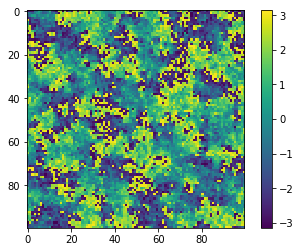

In [60]:
plt.imshow(xy.lattice)
plt.colorbar()
plt.show()

In [35]:
min_T = 0.001
max_T = 2.0
L = 10

In [ ]:
for T in np.linspace(min_T, max_T, 20):
    # TODO
    pass